In [14]:
#import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('Levels_Fyi_Salary_Data.csv')
salaryDF = df[['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany', 'basesalary']]

In [16]:
salaryDF

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary
0,127000,1.5,1.5,107000.0
1,100000,5.0,3.0,0.0
2,310000,8.0,0.0,155000.0
3,372000,7.0,5.0,157000.0
4,157000,5.0,3.0,0.0
...,...,...,...,...
62637,327000,10.0,1.0,155000.0
62638,237000,2.0,2.0,146900.0
62639,220000,14.0,12.0,157000.0
62640,280000,8.0,4.0,194688.0


In [17]:
X = salaryDF.iloc[:,1:]   #iloc is used to select specific columns and rows.I select all the rows and columns from 2nd one to last one.
y_train = salaryDF.iloc[:50000,0]
y_test = salaryDF.iloc[50000:,0]

rows = X.shape[0]
N_TRAIN = 50000
count = 0
train_err = {}
test_err = {}

In [27]:
for i in range(1,6):
  A = np.ones([rows, (3*i)+1])
  print(A.shape)
  for j in range(0,3):
    for k in range(1, i+1):
        A[:,count]=np.power(np.array(X.iloc[:,j]).T, k)
        count = count+1
  #splitting the x-values with monomials into training and testing
  print(A[1])
  x_train = A[0:N_TRAIN,:]
  x_test = A[N_TRAIN:,:]
    
  print(x_train.shape)
  w = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T.dot(y_train))
  #calculate training error
  y_train_pred = x_train.dot(w)
  rms_train = rmse(y_train, y_train_pred)
  train_err[i] = rms_train
  print(rms_train)
    
    
  #calculate test error
  y_test_pred = x_test.dot(w)
  rms_test = rmse(y_test, y_test_pred)
  print(rms_test)
  test_err[i] = rms_test
    
  count = 0
    

(62642, 4)
[5. 3. 0. 1.]
(50000, 4)
92469.43809773953
121382.52351504721
(62642, 7)
[ 5. 25.  3.  9.  0.  0.  1.]
(50000, 7)
91573.99026037064
129644.37305767741
(62642, 10)
[  5.  25. 125.   3.   9.  27.   0.   0.   0.   1.]
(50000, 10)
82679.3080370408
450246.99728997156
(62642, 13)
[  5.  25. 125. 625.   3.   9.  27.  81.   0.   0.   0.   0.   1.]
(50000, 13)
76200.18255097655
1486057.6706246205
(62642, 16)
[5.000e+00 2.500e+01 1.250e+02 6.250e+02 3.125e+03 3.000e+00 9.000e+00
 2.700e+01 8.100e+01 2.430e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 1.000e+00]
(50000, 16)
75412.29147140743
1535500.47922259


Text(0.5, 0, 'Polynomial degree')

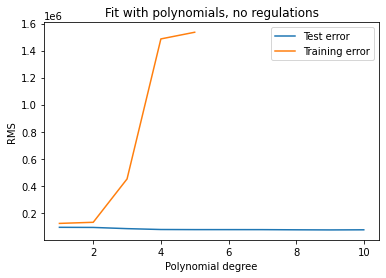

In [28]:
#Produce a plot of results.
plt.plot(list(train_err.keys()), list(train_err.values()))
plt.plot(list(test_err.keys()), list(test_err.values()))
plt.ylabel('RMS')
plt.legend(['Test error','Training error'])
plt.title('Fit with polynomials, no regulations')
plt.xlabel('Polynomial degree')